## About Dataset

**Context**<br>
This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016.Note that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. A common mistake people make when analyzing this data is to assume that the Summer and Winter Games have always been staggered.<br><br>


**Data Description**<br>
The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are: <br>

**ID** - Unique number for each athlete<br>
**Name** - Athlete's name<br>
**Sex** - M or F<br>
**Age** - Integer<br>
**Height** - In centimeters<br
**Weight** - In kilograms<br>
**Team** - Team name<br>
**NOC**- National Olympic Committee 3-letter code<br>
**Games** - Year and season<br>
**Year** - Integer<br>
**Season** - Summer or Winter<br>
**City** - Host city<br>
**Sport** - Sport<br>
**Event** - Event<br>
**Medal** - Gold, Silver, Bronze, or NA<br><br>

The file noc_regions.csv contains 230 rows and 3 columns. Each row contains a
NOC and its related region and any notes. Columns are following:<br>
1. **NOC** - National Olympic Committee 3-letter code;
2. **Region** - Name of country
3. **Notes** - String containing any useful information about region and NOC

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns

#Libraries for plotting 
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import klib



In [36]:
df = pd.read_csv('Data/athlete_events.csv')
noc_regions =pd.read_csv('Data/noc_regions.csv')

In [67]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [38]:
noc_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


#### Joining the dataframes

In [39]:
df.shape

(271116, 15)

In [40]:
noc_regions.shape

(230, 3)

In [41]:
olympics = df.merge(noc_regions, how = 'left', on ='NOC')

In [42]:
olympics.shape

(271116, 17)

In [68]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


#### Understanding the data

In [44]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


There are 12 categorical features and 5 numerical features

In [45]:
#Renaming the notes are region columns so that they start with an uppercase in order to match the column naming
olympics.rename(columns ={ 'region' :'Region', 
                           'notes'  : 'Notes'    
}, inplace= True
                )

In [46]:
olympics.duplicated().sum()

1385

#### Descriptive analysis 

In [47]:
olympics.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.0,102097.25,135571.0
Age,261642.0,25.556898,6.393561,10.0,21.0,24.0,28.00,97.0
Height,210945.0,175.338970,10.518462,127.0,168.0,175.0,183.00,226.0
Weight,208241.0,70.702393,14.348020,25.0,60.0,70.0,79.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.0,2002.00,2016.0


##### Checking for nulls

In [48]:
olympics.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

<Axes: >

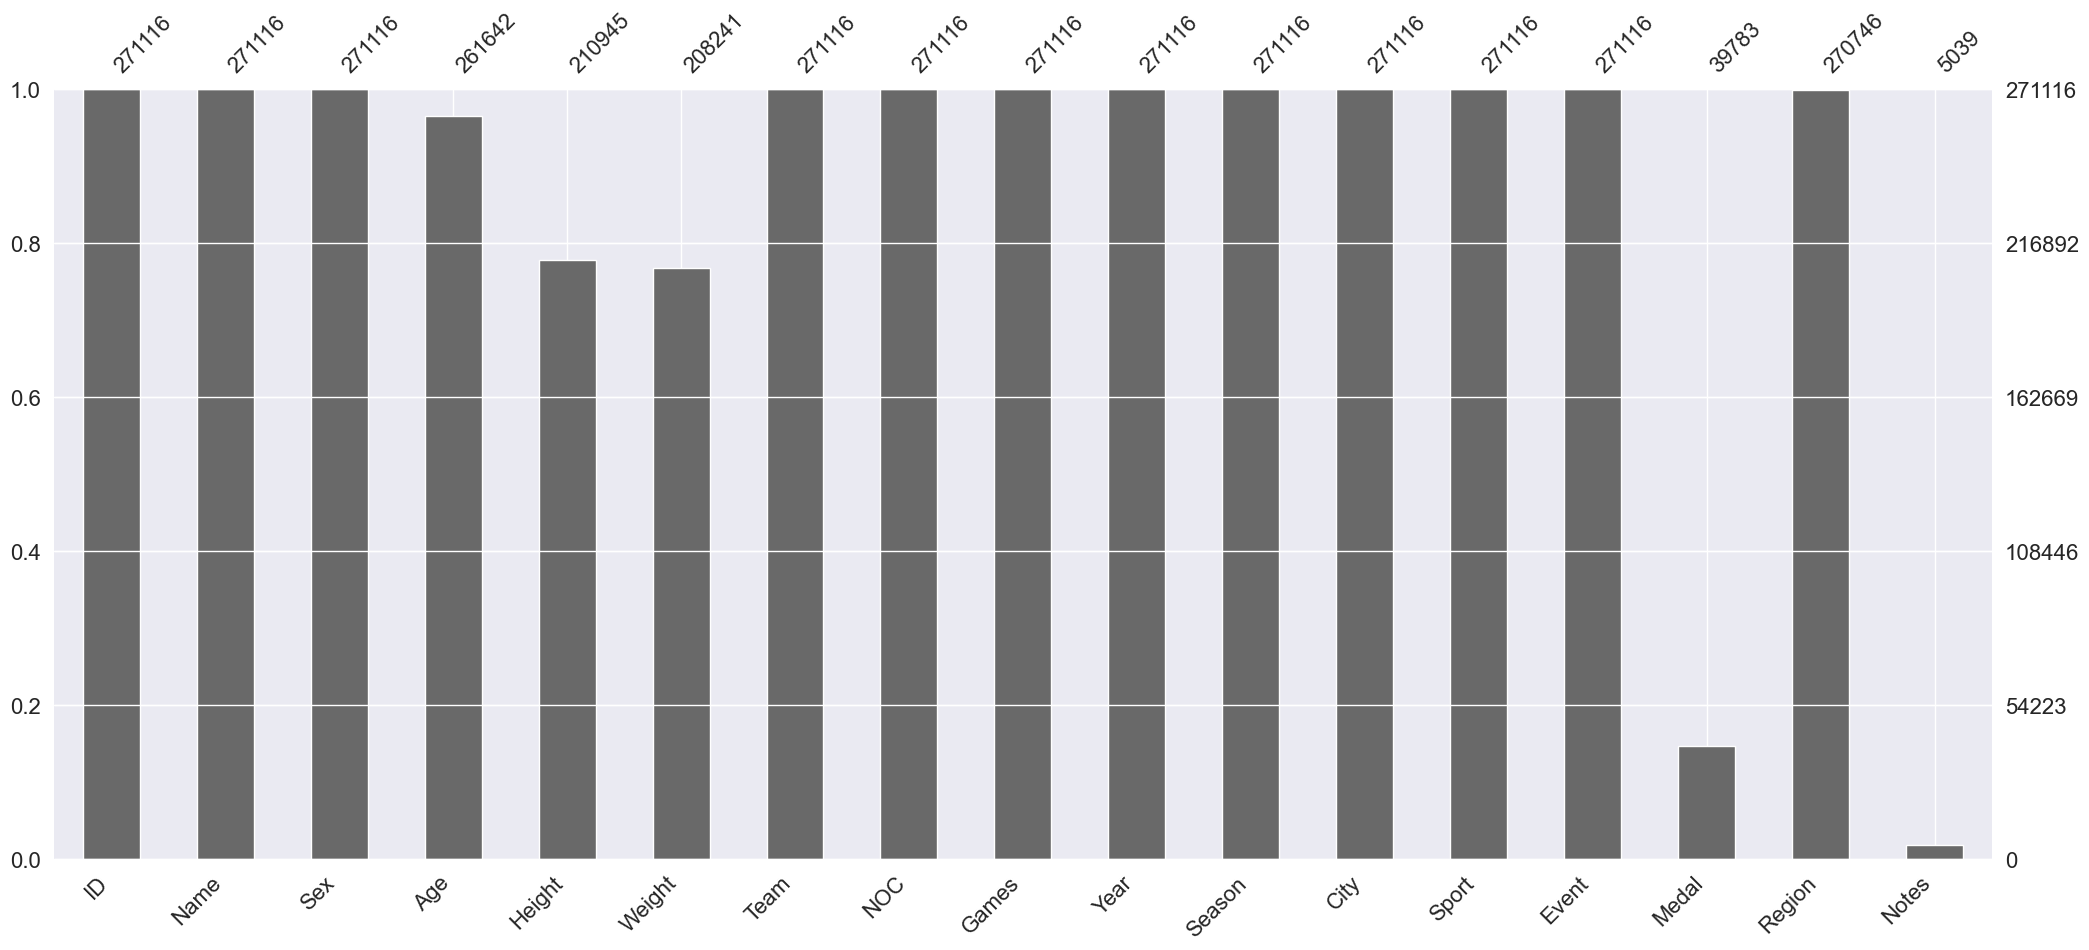

In [49]:
#visualization of nulls
msno.bar(olympics)

Age, Weight, Medal, Height and Notes columns contain missing values

In [50]:
olympics.isnull().sum()[olympics.isnull().sum() >0]

Age         9474
Height     60171
Weight     62875
Medal     231333
Region       370
Notes     266077
dtype: int64

In [51]:
#columns with null values
null_cols = olympics.columns[olympics.isnull().any()].tolist()
null_cols

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']

In [52]:
#Top 10 participating countries (Teams)
top_10_countries = olympics.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

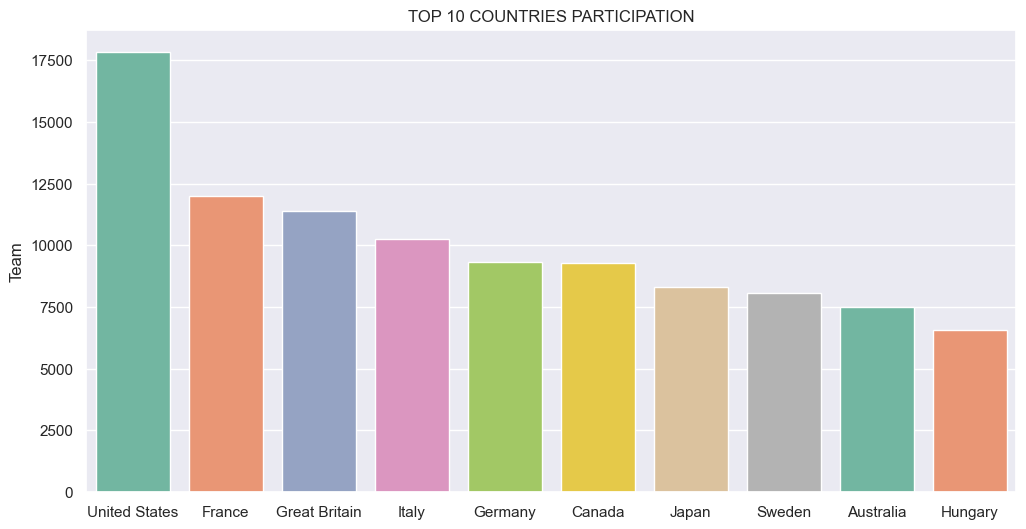

In [53]:
#Plot for top 10 countries

plt.figure(figsize=(12,6))

#plt.xticks(rotation=20)
plt.title('TOP 10 COUNTRIES PARTICIPATION')
sns.barplot(x=top_10_countries.index, y=top_10_countries, palette = 'Set2');

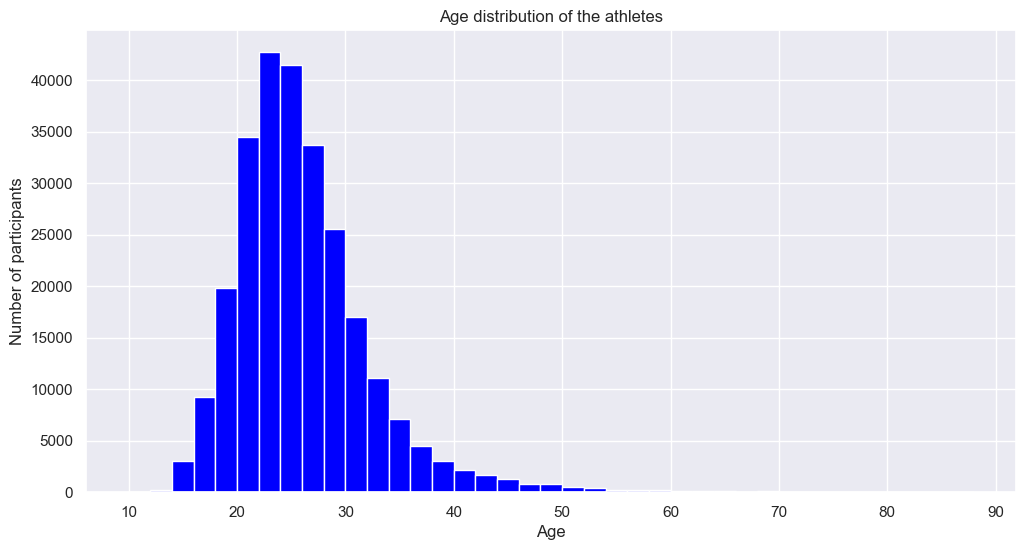

In [54]:
#Investigating the data age distribution of the participants

plt.figure(figsize=(12,6))
plt.title ("Age distribution of the athletes")
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(olympics.Age, bins = np.arange(10,90,2), color = 'blue',edgecolor='white');

Interpretation: Most participants were aged between 23-26 years.

In [55]:
#Number of participants in respect to their gender
gender = olympics.Sex.value_counts()
gender

M    196594
F     74522
Name: Sex, dtype: int64

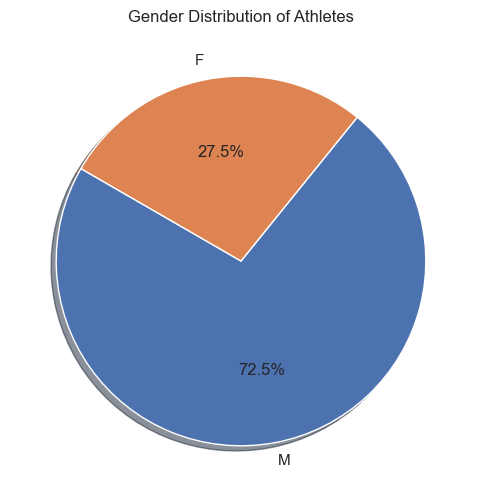

In [56]:
#Pie plot for male and female distribution of athletes

plt.figure(figsize=(12,6))
plt.title('Gender Distribution of Athletes')
plt.pie(gender, labels=gender.index , autopct='%1.1f%%',startangle=150, shadow=True);


In [57]:
#Total number of males in each olympics over the summer across the years
males = olympics[(olympics.Sex == 'M') & (olympics.Season=='Summer')][['Sex','Year']]
males = males.groupby('Year').count().reset_index()
males.head()

,Year,Sex
0,1896,380
1,1900,1903
2,1904,1285
3,1906,1722
4,1908,3054


In [58]:
#Total number of males in each olympics over the winter across the years
males = olympics[(olympics.Sex == 'M') & (olympics.Season=='Winter')][['Sex','Year']]
males = males.groupby('Year').count().reset_index()
males.head()

,Year,Sex
0,1924,443
1,1928,549
2,1932,330
3,1936,814
4,1948,942


In [59]:
#Women participation during summer season olympics across the years
women = olympics[(olympics.Sex == 'F') & (olympics.Season == 'Summer')][['Sex','Year']]
women = women.groupby('Year').count().reset_index()
women.head()


,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87


Text(0.5, 1.0, 'Women participation in olympics across the years in summer season')

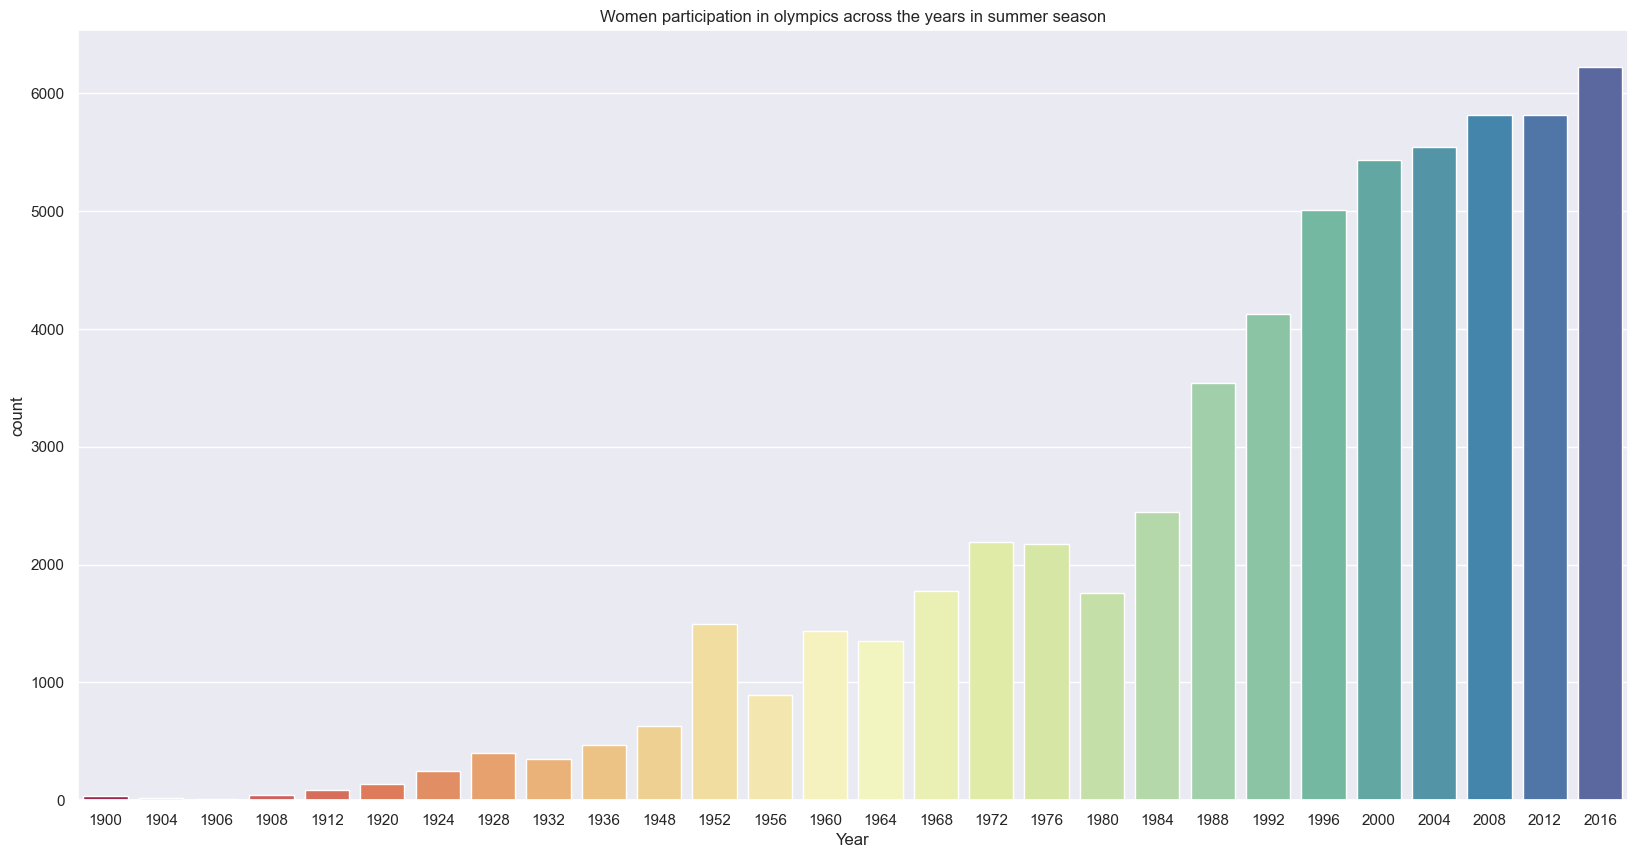

In [60]:
#Women participation in olympics across the years
females = olympics[(olympics.Sex == 'F') & (olympics.Season == 'Summer')]

sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(x='Year', data=females, palette="Spectral")
plt.title('Women participation in olympics across the years in summer season')

Text(0.5, 1.0, 'Women participation in olympics across the years in winter season')

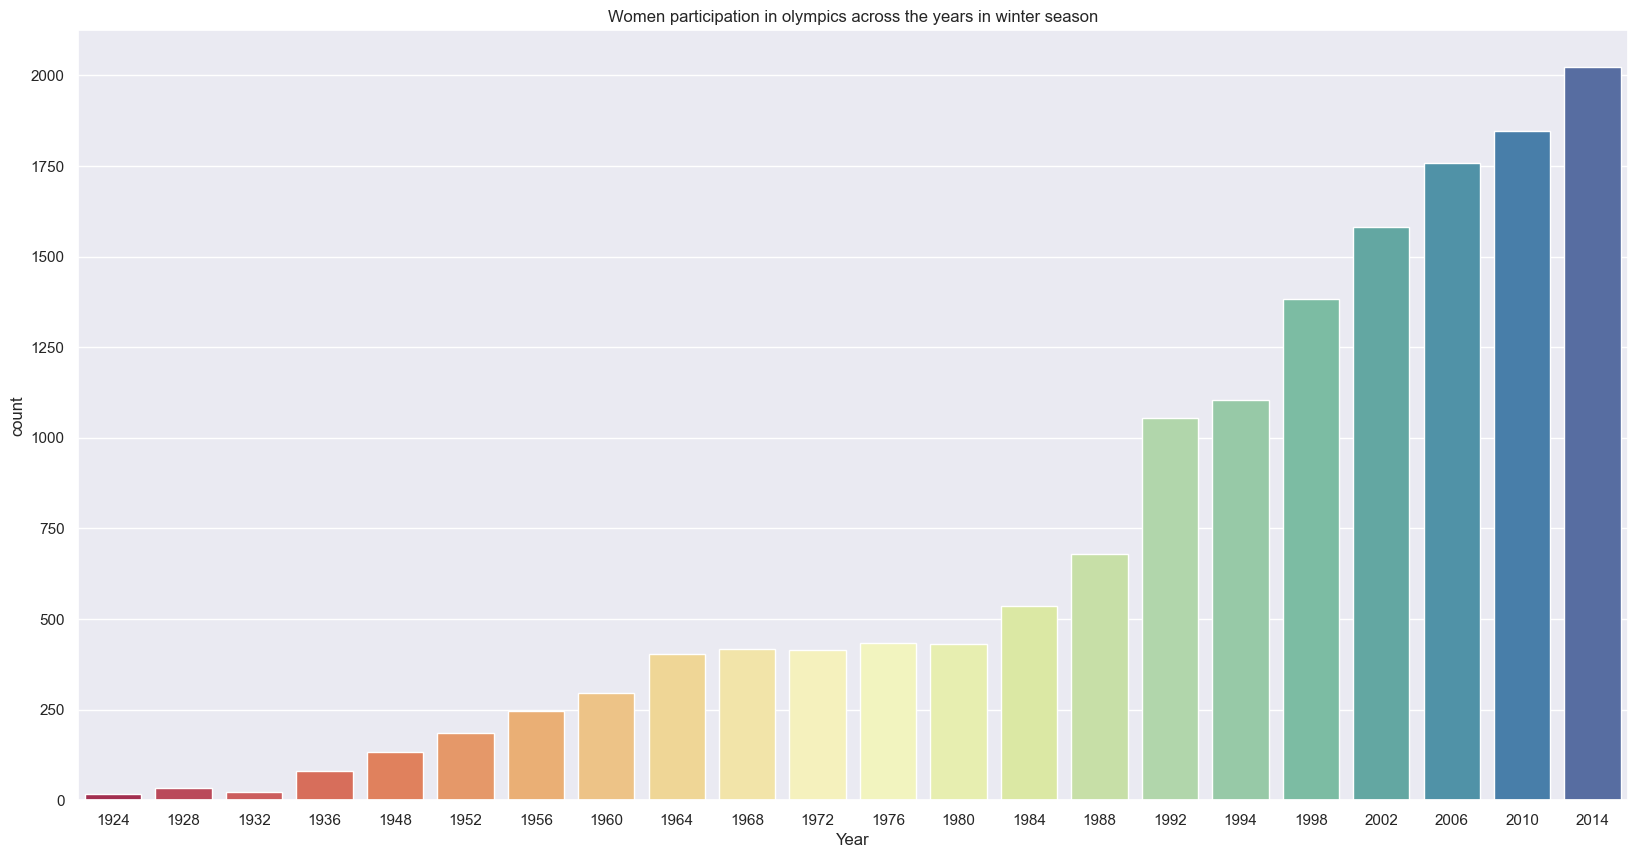

In [61]:
#Women participation in olympics across the years
females = olympics[(olympics.Sex == 'F') & (olympics.Season == 'Winter')]

sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(x='Year', data=females, palette="Spectral")
plt.title('Women participation in olympics across the years in winter season')

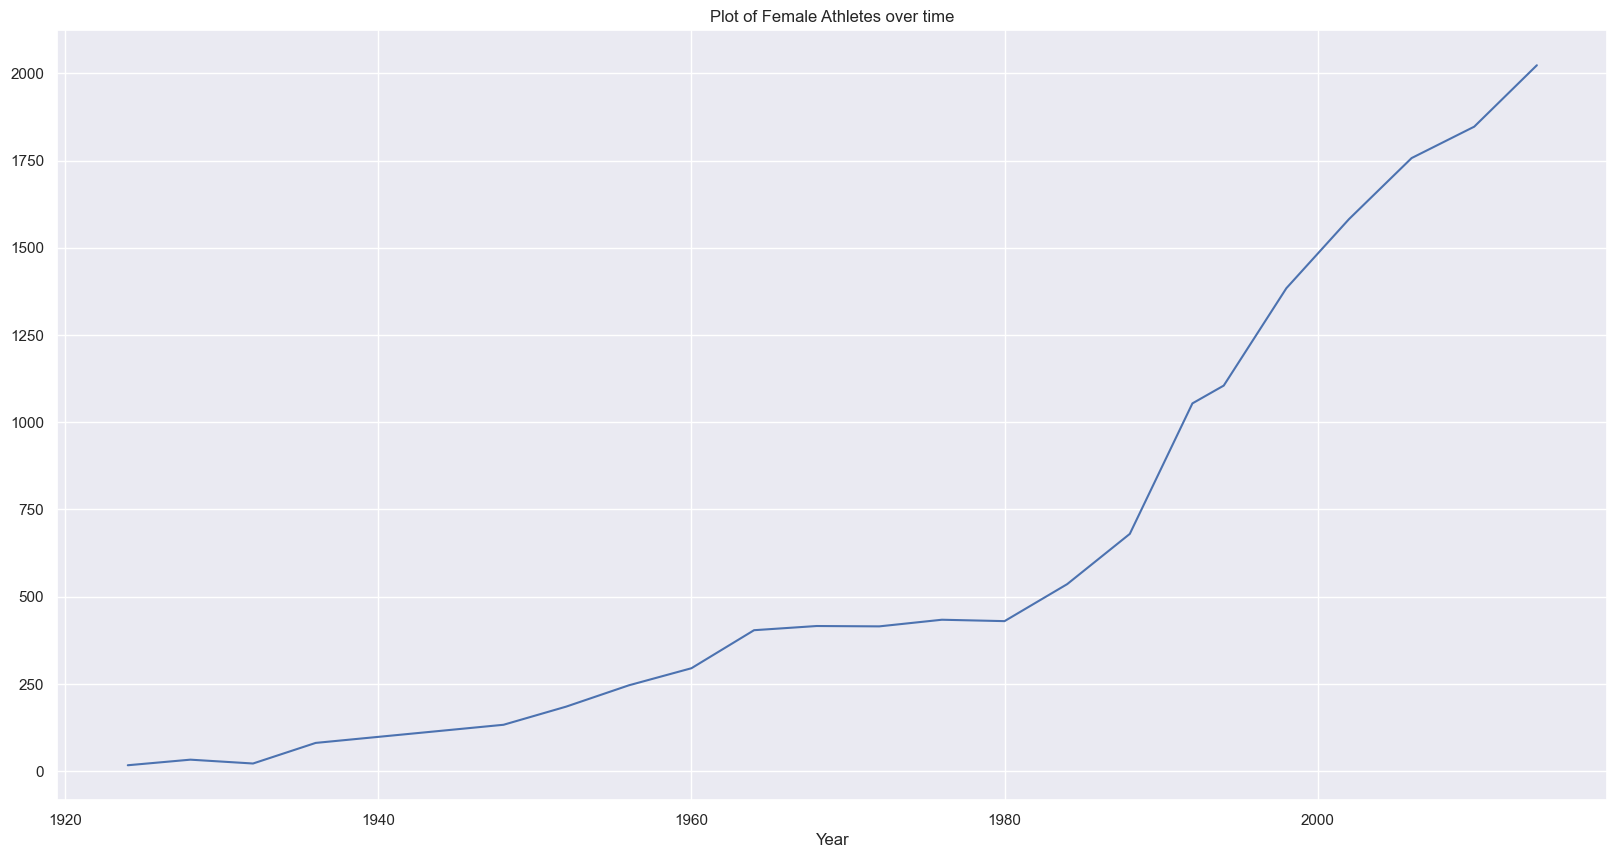

In [62]:
part = females.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:,'F'].plot()
plt.title('Plot of Female Athletes over time');

##### Medals

In [63]:
#Various medals that were won
medals = olympics.Medal.value_counts()
medals

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

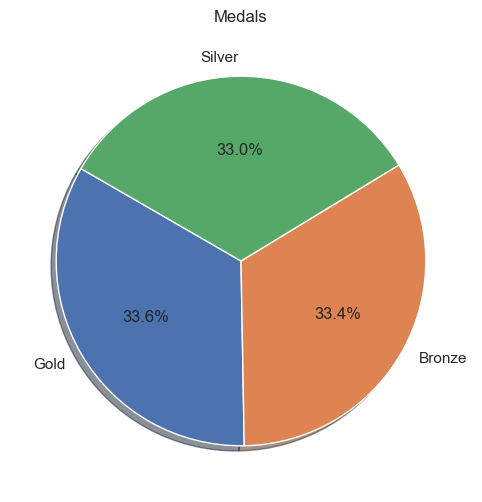

In [64]:
#Pie plot for medals won

plt.figure(figsize=(12,6))
plt.title('Medals')
plt.pie(medals, labels=medals.index , autopct='%1.1f%%',startangle=150, shadow=True);

##### Checking sports played during various seasons

In [65]:
#Sports played during the winter season
winter_sports = olympics[olympics.Season == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [66]:
#Sports played in the summer season
summer_sports = olympics[olympics.Season == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)